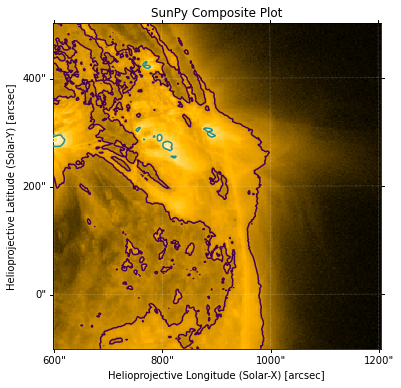

In [1]:
import matplotlib.pyplot as plt
from pylab import figure
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import sunpy.map

import sunpy.data.sample

# Load in the sample aia map and submap
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
bl = [600, -100] * u.arcsec
tr = [1200, 500] * u.arcsec
aia_smap = aia_map.submap(SkyCoord(*bl, frame=aia_map.coordinate_frame),
                          top_right=SkyCoord(*tr, frame=aia_map.coordinate_frame))

# Make copy for the contour layer
cas=sunpy.map.Map(aia_smap.data,aia_smap.meta)

# Set colour for contours 
# Neither of these work? Can't change to different cm or just one color?
# cas.plot_settings['cmap']=cm.gray # Doesn't work?
cas.plot_settings['cmap']=LinearSegmentedColormap.from_list("", ['white','white']) # Doesn't work?
# cas.plot_settings['cmap']=LinearSegmentedColormap.from_list('simple', [(1,1,1),(1,1,1)], N=2)
# Make contour map and set contour levels
conta=sunpy.map.Map(aia_smap,cas,composite=True)
conta.set_levels(index=1, levels=[10,50,90],percent=True)

# Plot the map + contours
fig = plt.figure(figsize=(6.5,6))
ax1 = fig.add_subplot(1, 1, 1,projection=aia_smap)
conta.plot(axes=ax1)
plt.show()

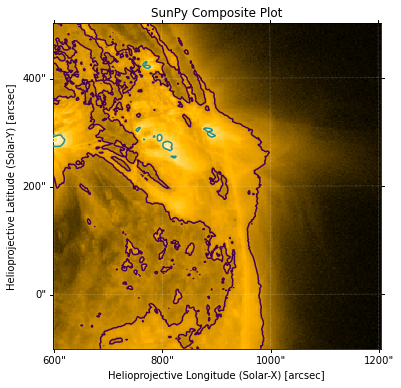

In [2]:
# Does this now work ???
conta.set_plot_settings(1, {'cmap': LinearSegmentedColormap.from_list("", ['white', 'white'])})
fig = plt.figure(figsize=(6.5,6))
ax1 = fig.add_subplot(1, 1, 1,projection=aia_smap)
conta.plot(axes=ax1)
plt.show()

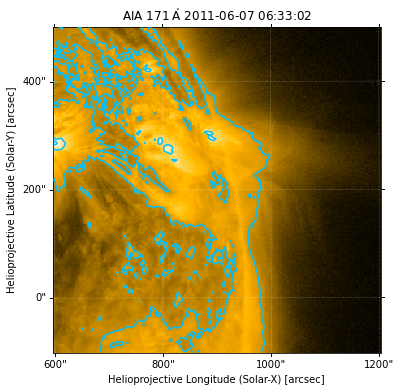

In [3]:
# How to actually do it in v3 sunpy
fig = plt.figure(figsize=(6.5,6))
ax1 = fig.add_subplot(1, 1, 1,projection=aia_smap)
aia_smap.plot()
aia_smap.draw_contours(levels=[10,50,90]*u.percent, axes=ax1, colors='deepskyblue')
plt.show()

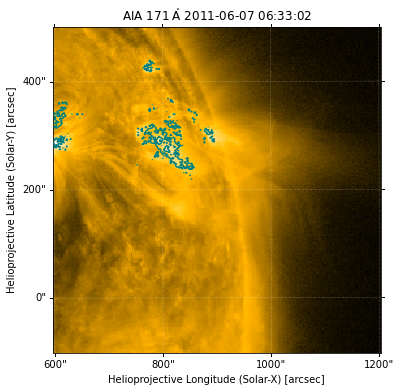

In [4]:
# Contours without the composite
aia_094_map = sunpy.map.Map(sunpy.data.sample.AIA_094_IMAGE)
bl = [600, -100] * u.arcsec
tr = [1200, 500] * u.arcsec
aia_094_smap = aia_094_map.submap(SkyCoord(*bl, frame=aia_094_map.coordinate_frame),
                          top_right=SkyCoord(*tr, frame=aia_094_map.coordinate_frame))

fig = plt.figure(figsize=(6.5,6))
ax1 = fig.add_subplot(1, 1, 1,projection=aia_smap)
aia_smap.plot()
aia_094_smap.draw_contours(levels=[30,60,90]*u.percent, axes=ax1, colors='teal')
plt.show()